<a href="https://colab.research.google.com/github/utkarsh-prakash/Google-Colab-Notebooks/blob/main/Multi_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [2]:
window_size = 48

In [3]:
ts_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(32, 10),
  tf.keras.layers.SimpleRNN(64, return_sequences=True),
  tf.keras.layers.SimpleRNN(64, return_sequences=True),
  tf.keras.layers.SimpleRNN(64, return_sequences=True),
  tf.keras.layers.SimpleRNN(32)
])

feature_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu')
])

feature_in = tf.keras.layers.Input(shape=(31, ), name='Feature-In')
ts_in = tf.keras.layers.Input(shape=(window_size,1), name='TS-In')

feature_out = feature_model(feature_in)
ts_out = ts_model(ts_in)

comb = tf.keras.layers.Concatenate()([ts_out, feature_out])

main_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(1)
])
model = main_model(comb)

model = tf.keras.Model([feature_in, ts_in], model)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
TS-In (InputLayer)              [(None, 48, 1)]      0                                            
__________________________________________________________________________________________________
Feature-In (InputLayer)         [(None, 31)]         0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 32)           26176       TS-In[0][0]                      
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 10)           430         Feature-In[0][0]                 
______________________________________________________________________________________________

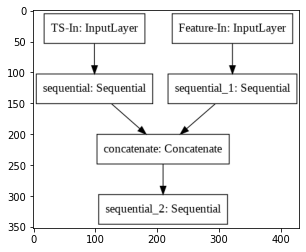

In [4]:
from tensorflow.keras.utils import plot_model

# Plot model
plot_model(model, to_file='model.png')

# Display the image
data = plt.imread('model.png')
plt.imshow(data);

In [5]:
# model.compile(_)
# model.fit([feature_train_x, ts_train_x], train_y, ...)